In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
DEVICE

device(type='cuda')

In [3]:
EPOCHS = 20
BATCH_SIZE = 64

In [4]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [5]:
trainset = datasets.FashionMNIST(
    root      = '../../data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = '../../data/', 
    train     = False,
    download  = True,
    transform = transform
)


Extracting ../../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../../data/FashionMNIST/raw




Extracting ../../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../../data/FashionMNIST/raw




Extracting ../../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/FashionMNIST/raw




Extracting ../../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
print(len(trainset), len(testset))
train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE
)

60000 10000


In [7]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

torch.Size([64, 1, 28, 28])
torch.Size([3, 224, 224])


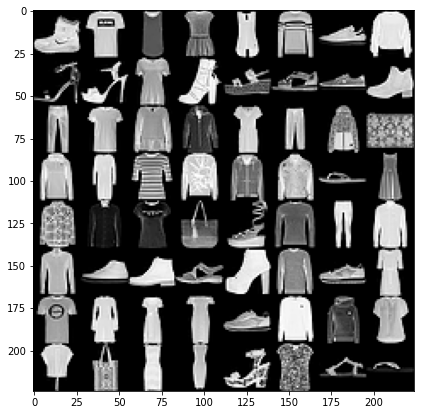

In [8]:
print(images.shape) # torch.Size([64, 1, 28, 28])
img   = utils.make_grid(images, padding=0)
npimg = img.numpy()
print(img.shape)    # torch.Size([3, 224, 224])
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [9]:
print(labels)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5])


In [10]:
print(trainset.classes)
CLASSES = dict()
for i in range(10) :
    CLASSES[i] = trainset.classes[i]
print(CLASSES)


for i, label in enumerate(labels):
    index = label.item()
    print("{:12}".format(CLASSES[index]), end=' ')
    if i % 8 == 7:
        print()

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
Ankle boot   T-shirt/top  T-shirt/top  Dress        T-shirt/top  Pullover     Sneaker      Pullover     
Sandal       Sandal       T-shirt/top  Ankle boot   Sandal       Sandal       Sneaker      Ankle boot   
Trouser      T-shirt/top  Shirt        Coat         Dress        Trouser      Coat         Bag          
Coat         Dress        T-shirt/top  Pullover     Coat         Coat         Sandal       Dress        
Shirt        Shirt        T-shirt/top  Bag          Sandal       Pullover     Trouser      Shirt        
Shirt        Sneaker      Ankle boot   Sandal       Ankle boot   Pullover     Sneaker      Dress        
T-shirt/top  Dress        Dress        Dress        Sneaker      Pullover     Pullover     Shirt        
Shirt        Bag     

(28, 28)


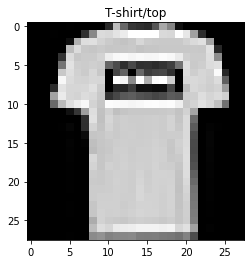

In [11]:
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

## 아래 함수를 완성해보세요. 활용이 가능하신 분은 Baseline으로 제시된 성능 보다 더 나은 성능을 내보세요.

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(784, 10)

        
        
                      
    def forward(self, x):
        x = x.view(-1, 784)  # 64 * 28 * 28 -> 64 * 784
        x = self.fc1(x)
        
        
        
        return x


In [13]:
model        = Net().to(DEVICE)
optimizer    = optim.SGD(model.parameters(), lr=0.01)

In [14]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [15]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()
            pred = output.max(1, keepdim=True)[1]  # max value, argmax
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [16]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 1.2740, Accuracy: 60.09%
[2] Test Loss: 1.1917, Accuracy: 61.57%
[3] Test Loss: 1.1544, Accuracy: 62.11%
[4] Test Loss: 1.1314, Accuracy: 62.46%
[5] Test Loss: 1.1153, Accuracy: 62.76%
[6] Test Loss: 1.1033, Accuracy: 62.95%
[7] Test Loss: 0.9097, Accuracy: 71.88%
[8] Test Loss: 0.8917, Accuracy: 72.12%
[9] Test Loss: 0.8814, Accuracy: 72.29%
[10] Test Loss: 0.8738, Accuracy: 72.35%
[11] Test Loss: 0.8676, Accuracy: 72.46%
[12] Test Loss: 0.8625, Accuracy: 72.51%
[13] Test Loss: 0.8581, Accuracy: 72.53%
[14] Test Loss: 0.8543, Accuracy: 72.58%
[15] Test Loss: 0.8509, Accuracy: 72.61%
[16] Test Loss: 0.8478, Accuracy: 72.70%
[17] Test Loss: 0.8450, Accuracy: 72.71%
[18] Test Loss: 0.8425, Accuracy: 72.77%
[19] Test Loss: 0.8402, Accuracy: 72.84%
[20] Test Loss: 0.7520, Accuracy: 76.66%


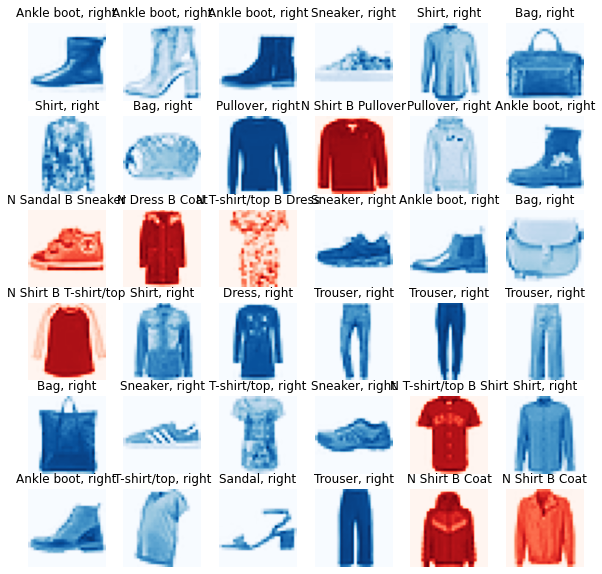

In [17]:
columns = 6
rows = 6
fig = plt.figure(figsize=(10,10))
 
model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(testset))
    input_img = testset[data_idx][0].unsqueeze(dim=0).to(DEVICE) 
 
    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = CLASSES[argmax.item()]
    label = CLASSES[testset[data_idx][1]]
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + ', right')
        cmap = 'Blues'
    else:
        plt.title('N ' + pred + ' B ' +  label)
        cmap = 'Reds'
    plot_img = testset[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')
    
plt.show() 